# Multi Layer neural network with Keras

In [1]:
import numpy as np
import tensorflow as tf

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

##### The matplotlib.image module provides functionalities for working with and displaying images within the Matplotlib framework.
This module allows you to load and manipulate image data, apply various image processing operations, and display images in plots or figures.
It supports various image formats such as PNG, JPEG, TIFF, and more.

### Step 1: Load the data and divide it into a training and testing dataset.

In [2]:
#Our first step is to load the data and divide it into a training and testing dataset. 
mnist = tf.keras.datasets.mnist

In [3]:
#The MNIST dataset can be downloaded directly from TensorFlow and has already been divided.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in [X_train, y_train, X_test, y_test] :
    print(i.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[:1,9:10]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253,
         253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0]]], dtype=uint8)

### Step 2: Normalize the features data

In [5]:
X_train, X_test = X_train/255, X_test/255
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
X_train[:1,9:10]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.31372549, 0.61176471,
         0.41960784, 0.99215686, 0.99215686, 0.80392157, 0.04313725,
         0.        , 0.16862745, 0.60392157, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ]]])

### Step 3: EDA with Plotting an image with colered and non-colored

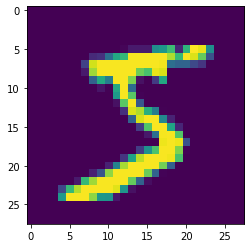

In [7]:
#plotting the colored image
plt.imshow(X_train[0])
plt.show();

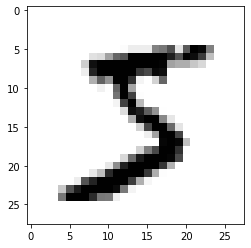

In [8]:
#plotting the non-colored image : cmap-colormap
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

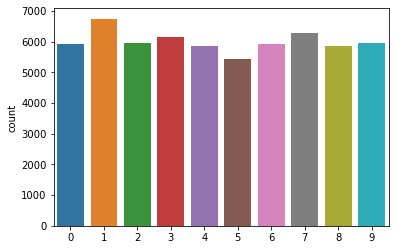

In [9]:
# counts of each digit present in our training dataset.
sns.countplot(y_train)

### Step 4: Build multi-layer model

#### Sequential : The Sequential class is a linear stack of layers used for building neural network models. It provides an easy way to build and train models by simply adding layers one after another.
The add() method is used to add layers to the model.
#### Flatten : Flatten is a layer in Keras that reshapes the input tensor into a 1-dimensional array. It is commonly used as the first layer in a neural network model when working with input data in the form of images or multidimensional arrays.
input_shape=(28, 28) specifies the shape of the input data that will be fed into the model. In this case, it indicates that the input data is a 2-dimensional array with dimensions 28x28, representing an image with a resolution of 28 pixels by 28 pixels.
#### Dense : When you add a Dense layer to your model using mymodel.add(Dense(...)), you are specifying the configuration and properties of that layer.
The output of each Dense layer becomes the input to the next layer, allowing the network to learn hierarchical representations of the data.

##### *optimizer: The optimizer determines how the model is updated based on the computed gradients of the loss function.
##### *loss: The loss function measures the discrepancy between the predicted output and the actual target output.
For classification tasks with mutually exclusive classes, 'sparse_categorical_crossentropy' is a commonly used loss function.
It calculates the cross-entropy loss between the predicted class probabilities and the true class labels.

In [10]:
mymodel = Sequential()
mymodel.add(Flatten(input_shape=(28, 28)))

mymodel.add(Dense(units = 100,activation = 'relu'))
mymodel.add(Dense(units = 60,  activation = 'relu'))
mymodel.add(Dense(units = 30,  activation = 'relu'))
mymodel.add(Dense(10,activation='softmax'))

#mymodel.compile() is used to configure the learning process of a neural network model in Keras.
#It defines the optimizer, loss function, and evaluation metrics to be used during training.
mymodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mymodel.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1127 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0616 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9834


### Step 5: Evaluate the trained model on test dataset and make inference

In [11]:
mymodel.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1057 - accuracy: 0.9700


[0.10565289109945297, 0.9700000286102295]

In [12]:
#Inference
result=mymodel.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [13]:
# Set the print options to display in standard numbers
np.set_printoptions(suppress=True)

#sample location
n=1000
result[n]

array([0.        , 0.00000245, 0.00000002, 0.00000221, 0.00004376,
       0.00000002, 0.        , 0.00001465, 0.00000091, 0.999936  ],
      dtype=float32)

In [14]:
# The argmax() function in Python returns the index of the maximum value in an array.
result[n].argmax()

9

In [15]:
#Label for comparison
y_test[1000]

9

### Step 1:  Load the data and divide it into a training and testing dataset.

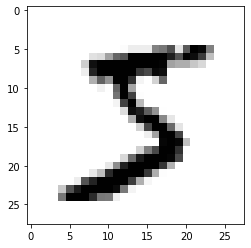

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written ditits 0-9

#Unpack the mnist data-set into train and test
#These are multi-dimensional array or we can call it tensors
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

### Step 2: Normalize data-set with scaling

In [17]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

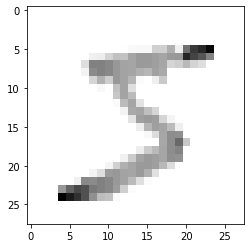

In [18]:
#plotting the non-colored image : cmap-colormap
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

### Step 3: Build multi-layer model

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

# The first and second hidden layer has 128 nodes and uses the relu activation function.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# The third hidden layer or output layer has one node and uses the sigmoid activation function.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#Compile the Keras Model
#Compiling the model uses the efficient numerical libraries under the covers (the so-called backend)
# The backend automatically chooses the best way to represent the network for training and 
# making predictions to run on your hardware, such as CPU, GPU, or even distributed.
#We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. 
# This is a popular version of gradient descent because it automatically tunes itself and 
# gives good results in a wide range of problems.

#In this case, use cross entropy as the loss argument.
model.compile(optimizer ='adam', 
              loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

#Train the model
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9213
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1095 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0731 - accuracy: 0.9772


#### An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass:

### Step 4: Evaluate the model

In [20]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9720
0.09506919234991074 0.972000002861023


### Step 5: Save the model and then reload the model to make predictions

In [21]:
#Save the model
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [22]:
#Re-Load the model
new_model = tf.keras.models.load_model('num_reader.model')

In [23]:
#Make predications: Here, it takes a list
predictions = new_model.predict([X_test])
#print(X_test)

313/313 [==============================] - 0s 1ms/step


In [24]:
import numpy as np
#Using argmax function gets the indices of maximum elements of single dimensions and multi-dimensional
#(row-wise or column-wise) of the given array.
print(np.argmax(predictions[0]))

7


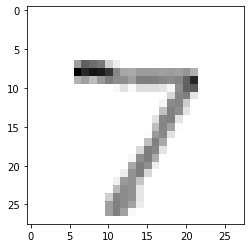

In [25]:
plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.show()